In [1]:
!pip install shap


In [2]:
import pandas as pd
import os
import numpy as np

In [3]:
#Для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set(rc={'figure.figsize':(15,5)})
plt.style.use('fivethirtyeight')

In [5]:
#Для выбора и моделирования элементов
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [6]:
import shap

In [7]:
train=pd.read_csv("/Users/georgymilyuskhov/Documents/train.csv")
train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [8]:
#проверяем столбцы
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [10]:
train.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<AxesSubplot:ylabel='wifi'>

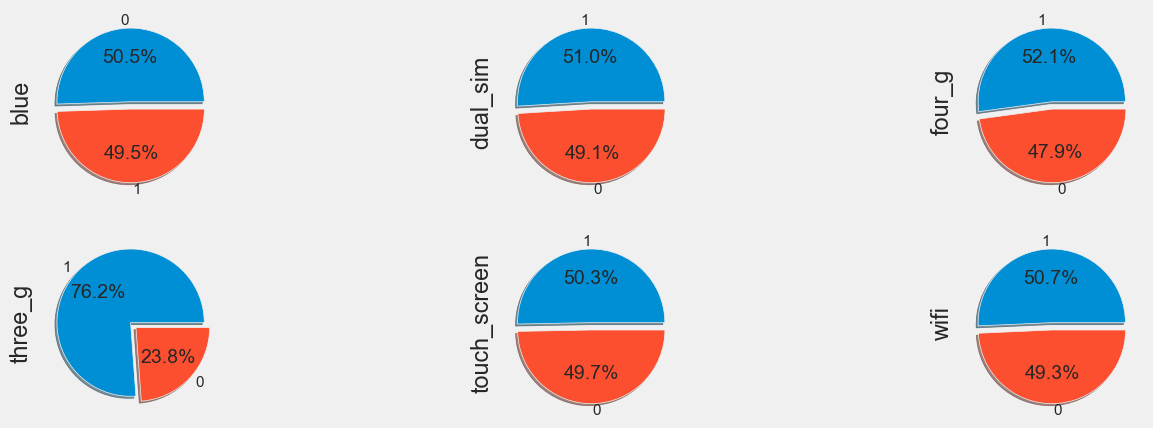

In [11]:
fig, ax =plt.subplots(2,3)
train['blue'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0,0],shadow=True)
train['dual_sim'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0,1],shadow=True)
train['four_g'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0,2],shadow=True)
train['three_g'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1,0],shadow=True)
train['touch_screen'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1,1],shadow=True)
train['wifi'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1,2],shadow=True)

<AxesSubplot:xlabel='wifi', ylabel='count'>

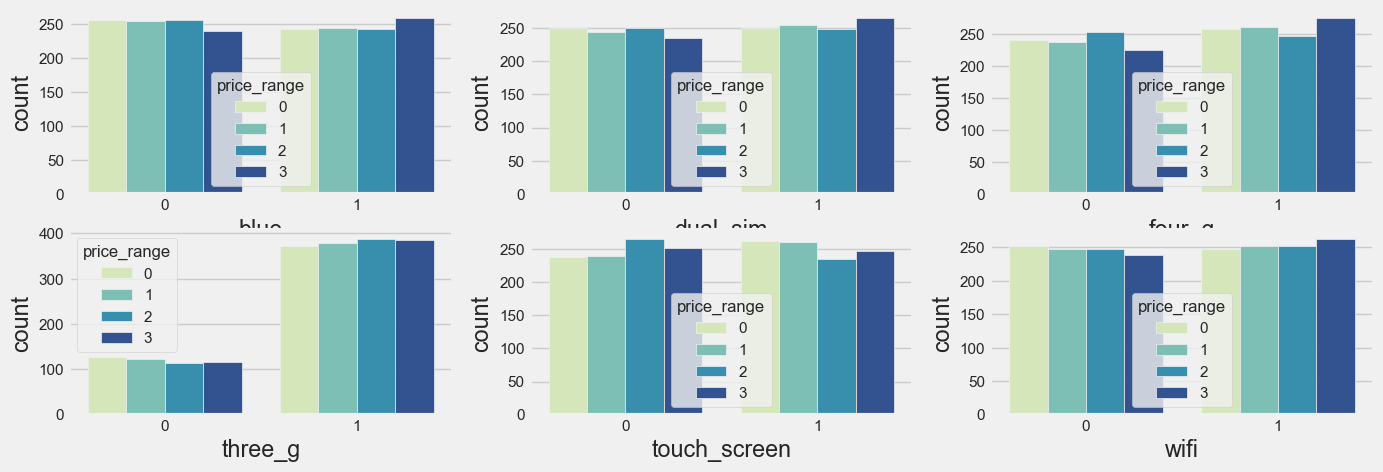

In [12]:
trenirovka_binar=train[['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']]
figs, axis=plt.subplots(2,3)

sns.countplot(data=trenirovka_binar,x="blue",hue="price_range",ax=axis[0,0],palette="YlGnBu")
sns.countplot(data=trenirovka_binar,x="dual_sim",hue="price_range",ax=axis[0,1],palette="YlGnBu")
sns.countplot(data=trenirovka_binar,x="four_g",hue="price_range",ax=axis[0,2],palette="YlGnBu")
sns.countplot(data=trenirovka_binar,x="three_g",hue="price_range",ax=axis[1,0],palette="YlGnBu")
sns.countplot(data=trenirovka_binar,x="touch_screen",hue="price_range",ax=axis[1,1],palette="YlGnBu")
sns.countplot(data=trenirovka_binar,x="wifi",hue="price_range",ax=axis[1,2],palette="YlGnBu")

In [13]:
train[["battery_power","price_range"]].groupby(["price_range"]).mean()

battery_power
price_range               
0                 1116.902
1                 1228.868
2                 1228.320
3                 1379.984

In [14]:
train['m_dep'].value_counts()

0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: m_dep, dtype: int64

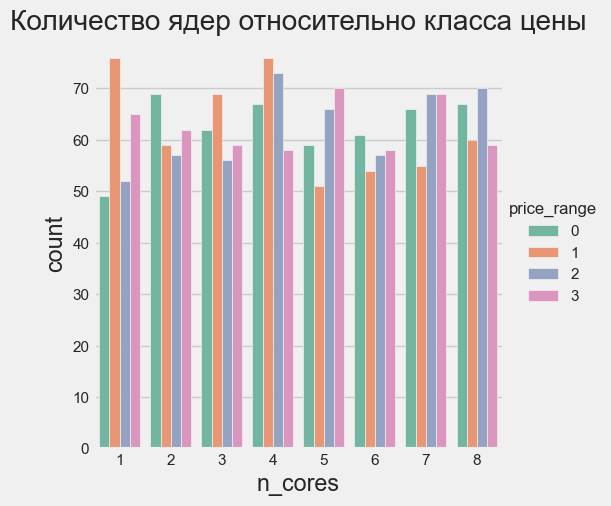

In [15]:
sns.catplot(data=train,x="n_cores",hue="price_range",kind="count",palette="Set2").set(title="Количество ядер относительно класса цены")
plt.show()

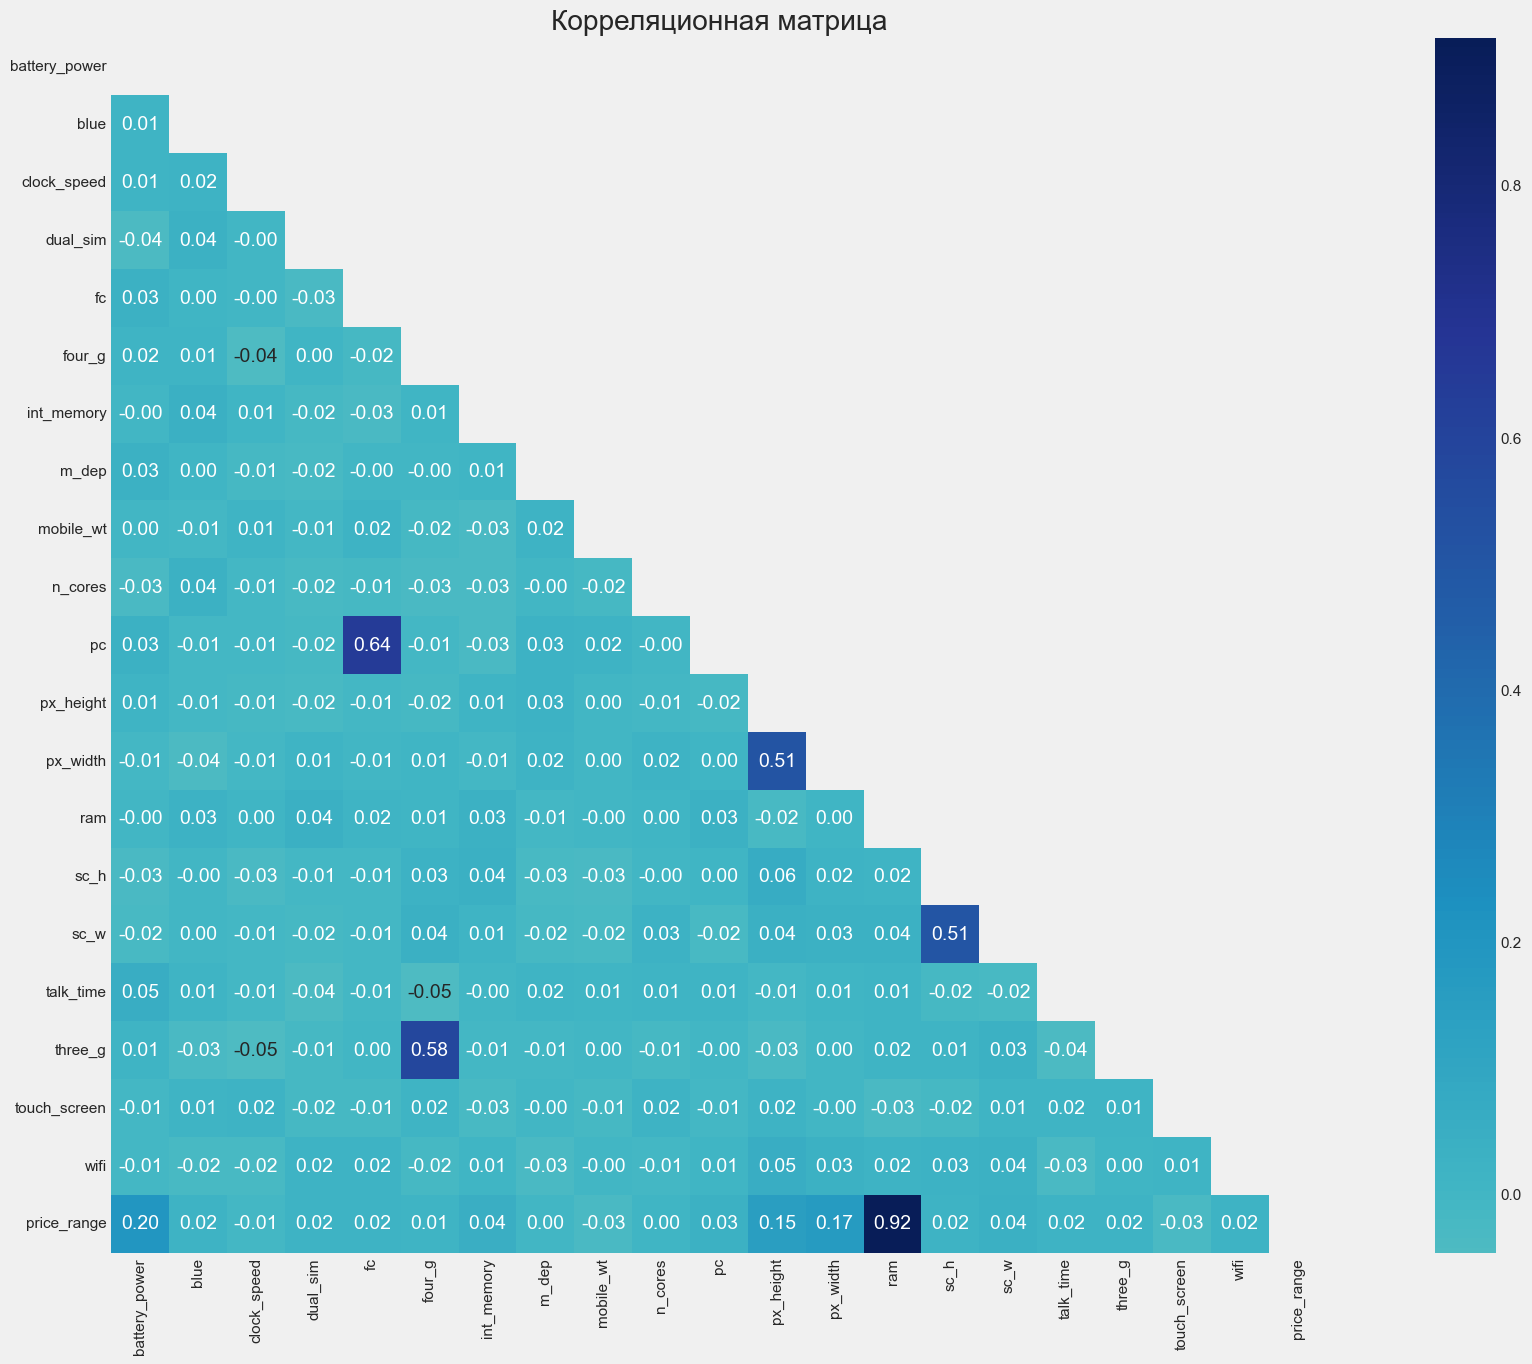

In [16]:
matrix=train.corr()
mask=np.triu(np.ones_like(matrix,dtype='bool'))

plt.figure(figsize=(25,15))
sns.heatmap(matrix,mask=mask,annot=True,center=0, fmt='.2f',square=True,cmap="YlGnBu").set(title="Корреляционная матрица")
plt.show()

In [17]:
Xtrenin=train.drop(columns='price_range',axis=1)
Ytrenin=train.price_range

In [18]:
X_trenin,X_test,Y_trenin,Y_test=train_test_split(Xtrenin,Ytrenin,test_size=0.3,random_state=1200,stratify=Ytrenin)
print(X_trenin.shape,X_test.shape)

(1400, 20) (600, 20)


In [19]:
clf=RandomForestClassifier(n_estimators=100,random_state=1200)
clf.fit(X_trenin,Y_trenin)
std=np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
feature_importances=pd.Series(clf.feature_importances_,index=X_trenin.columns)
print("Оценка:\n",clf.score(X_test,Y_test))

Оценка:
 0.87


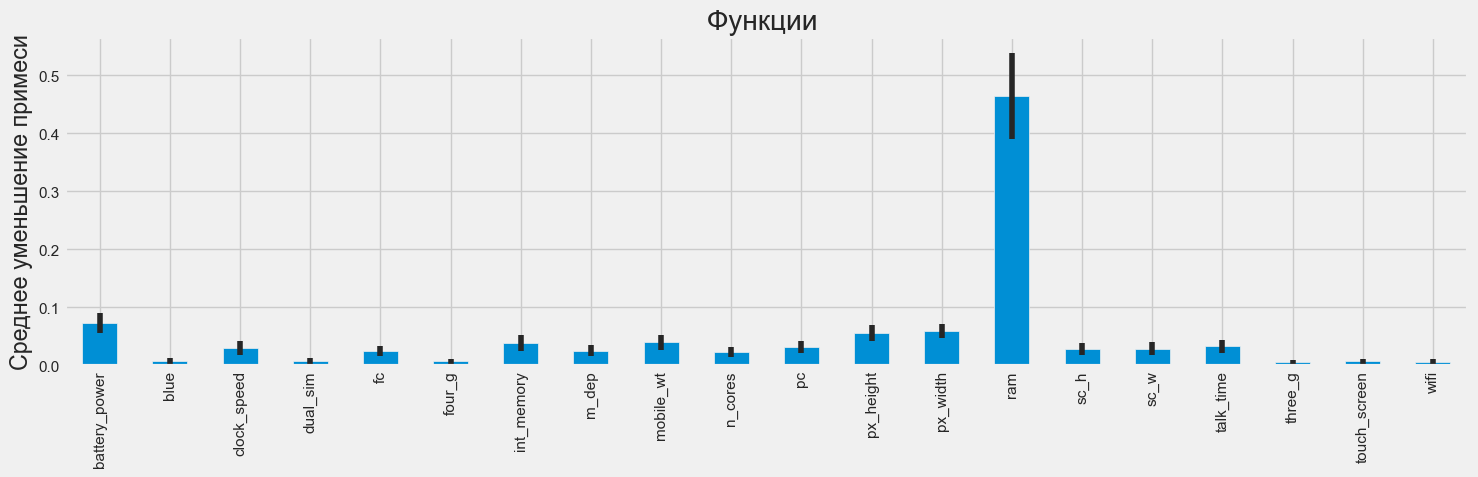

In [20]:
fig, ax=plt.subplots()
feature_importances.plot.bar(yerr=std,ax=ax)
ax.set_title("Функции ")
ax.set_ylabel("Среднее уменьшение примеси")
fig.tight_layout()
plt.show()

In [21]:
model0 = SelectFromModel(clf, prefit=True)
X_trenin_new = model0.transform(X_trenin) 

print('Вид тренировочных данных:',X_trenin_new.shape)
feature_names = X_trenin.columns[model0.get_support()]
print('Название функций \n',feature_names)

Вид тренировочных данных: (1400, 4)
Название функций 
 Index(['battery_power', 'px_height', 'px_width', 'ram'], dtype='object')


X has feature names, but SelectFromModel was fitted without feature names


In [22]:
X_test_new=X_test[['battery_power','px_height','px_width','ram']]

In [23]:
clf_modified=RandomForestClassifier(n_estimators=70,random_state=1200)
clf_modified.fit(X_trenin_new,Y_trenin)

RandomForestClassifier(n_estimators=70, random_state=1200)

In [24]:
clf_modified.score(X_test_new,Y_test)

X has feature names, but RandomForestClassifier was fitted without feature names


0.9066666666666666

In [25]:
explainer=shap.TreeExplainer(clf)
shap_values=explainer.shap_values(X_trenin)
print('Ожидаемые значения:',explainer.expected_value)

Ожидаемые значения: [0.24953571 0.24869286 0.25193571 0.24983571]


In [26]:
print("Shap значения для 'Price range0' класс")
pd.DataFrame(shap_values[0],columns=X_trenin.columns).head()

Shap значения для 'Price range0' класс


battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.047310  0.001503      0.00456  0.005277  0.012542  0.007559   
1       0.027309  0.000360     -0.00649  0.000063 -0.000872 -0.003318   
2      -0.071411  0.002442      0.00655  0.000959  0.003406  0.001053   
3       0.004268 -0.002006     -0.00852 -0.000534 -0.011324 -0.001934   
4       0.045075  0.004075      0.00128  0.001288 -0.003285  0.001116   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0    0.035605  0.008697   0.022106  0.004805  0.022504   0.068004 -0.030740   
1   -0.002464 -0.001940  -0.001982 -0.006232 -0.002729  -0.025288 -0.011131   
2    0.008389  0.017879   0.009446  0.009259  0.025681   0.017829  0.052693   
3   -0.001493  0.000824  -0.009111  0.001364 -0.006909   0.004961  0.012840   
4    0.016035  0.001917  -0.004259  0.006811  0.006582   0.041754  0.043127   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  
0  0.415436  0.007838  0.016771   0.008736  0.002750      0.010068  0.003752  
1 -0.152415 -0.002823 -0.005966  -0.003164 -0.000518      0.000686 -0.000622  
2  0.449161  0.014128  0.003087   0.012293  0.005197     -0.000235  0.002660  
3 -0.210935 -0.004152 -0.010896  -0.000127  0.000031     -0.002920 -0.002961  
4  0.473368 -0.004162  0.010397  -0.013278 -0.000023      0.003695 -0.001050

In [27]:
print("Shap значения для 'Price range3' класс")
pd.DataFrame(shap_values[3],columns=X_trenin.columns).head()

Shap значения для 'Price range3' класс


battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0       0.031844 -0.003436    -0.000301 -0.000638 -0.003896 -0.001316   
1      -0.028511  0.002053    -0.001102 -0.003941 -0.001315  0.000796   
2       0.035062 -0.001249     0.001168  0.000813 -0.003194 -0.003406   
3      -0.024394 -0.007436    -0.000530 -0.003242 -0.002875  0.000577   
4      -0.019490  0.001426    -0.000368 -0.003093  0.000062  0.001056   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0   -0.011832 -0.002692  -0.007928 -0.000990 -0.001864  -0.017450  0.027500   
1    0.004386 -0.001465  -0.003428 -0.005494 -0.005488   0.012820 -0.013176   
2   -0.000978  0.001814  -0.004843  0.001568  0.002773   0.000419 -0.018993   
3   -0.006220 -0.013998   0.022240 -0.001465  0.005304  -0.024551 -0.047621   
4   -0.005171 -0.001106   0.007795 -0.000785 -0.003915  -0.015259 -0.023698   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  
0 -0.257642  0.003261  0.003339  -0.005049 -0.000642      0.000332 -0.000435  
1 -0.181783  0.005886  0.000406   0.000269 -0.000400     -0.000873  0.000525  
2 -0.245222 -0.001754 -0.000108  -0.004677  0.000685     -0.000570  0.000857  
3 -0.054056 -0.004023 -0.000114  -0.002150 -0.000868     -0.002910 -0.001505  
4 -0.168570 -0.001324 -0.006420   0.000416 -0.000543     -0.000700 -0.000150

In [28]:
X_trenin.iloc[0]

battery_power    1763.0
blue                0.0
clock_speed         0.5
dual_sim            1.0
fc                 12.0
four_g              0.0
int_memory         10.0
m_dep               0.2
mobile_wt         184.0
n_cores             3.0
pc                 19.0
px_height         238.0
px_width         1893.0
ram               792.0
sc_h               17.0
sc_w               12.0
talk_time          13.0
three_g             1.0
touch_screen        0.0
wifi                1.0
Name: 1383, dtype: float64

In [29]:
Y_trenin.iloc[0]

0

In [30]:
shap.initjs()
shap.force_plot(explainer.expected_value[0],shap_values[0][0,:],X_trenin.iloc[0])

In [31]:
shap.initjs()
shap.force_plot(explainer.expected_value[3],shap_values[3][0,:],X_trenin.iloc[0,:])

In [32]:
shap.initjs()
shap.force_plot(explainer.expected_value[1],
shap_values[1][0,:], X_trenin.iloc[0,:])

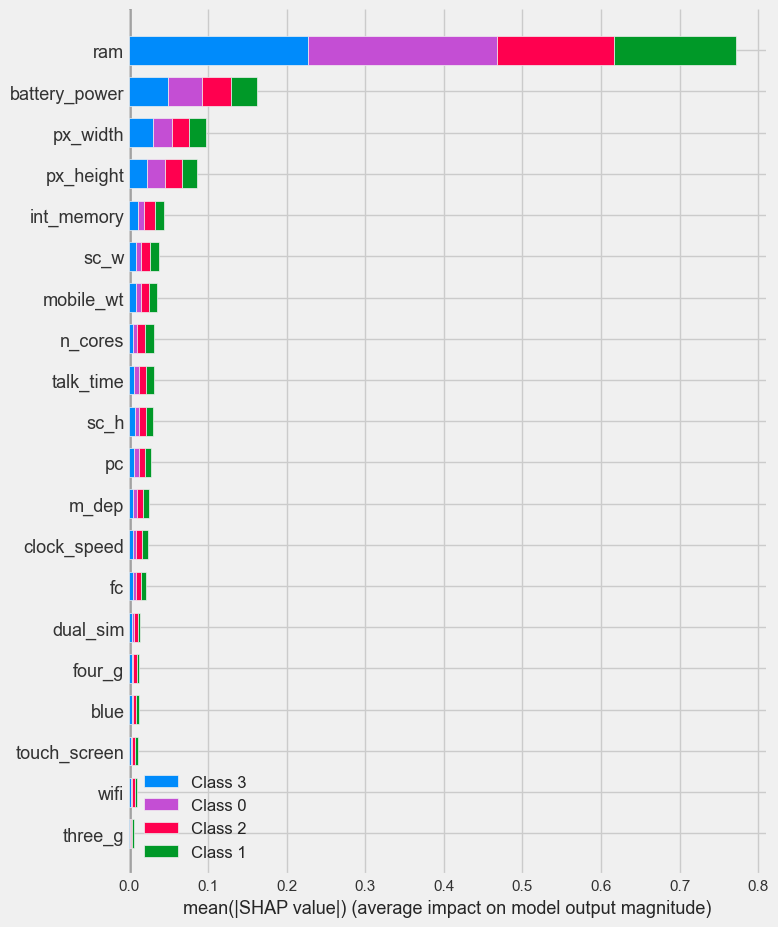

In [33]:
shap.initjs()
shap.summary_plot(shap_values,X_test)

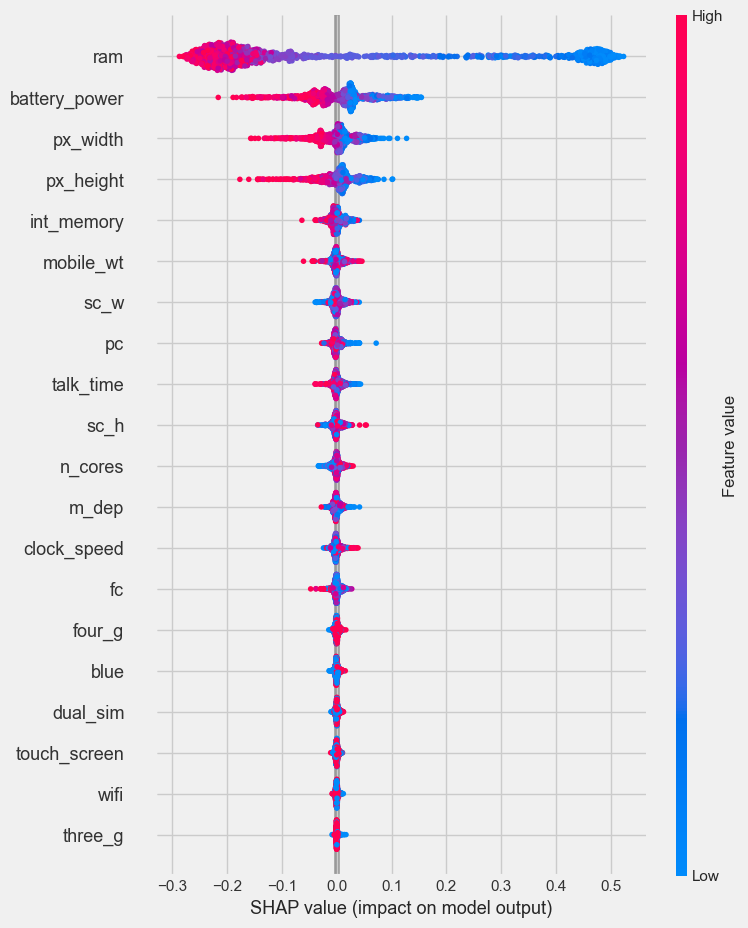

In [34]:
shap.initjs()
shap.summary_plot(shap_values[0],X_trenin)

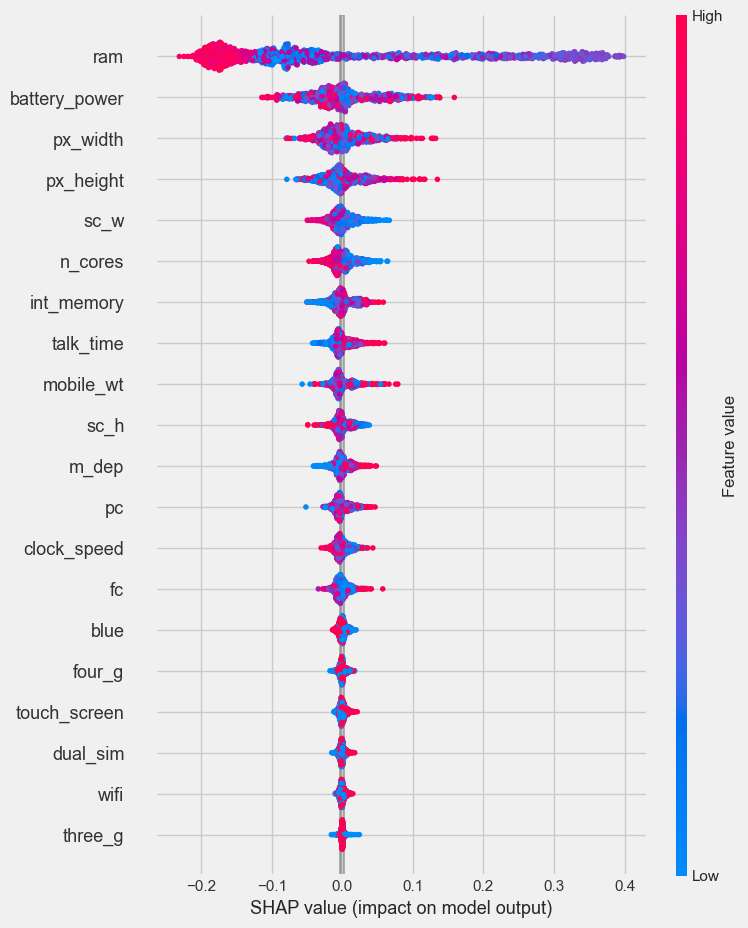

In [35]:
shap.initjs()
shap.summary_plot(shap_values[1],X_trenin)

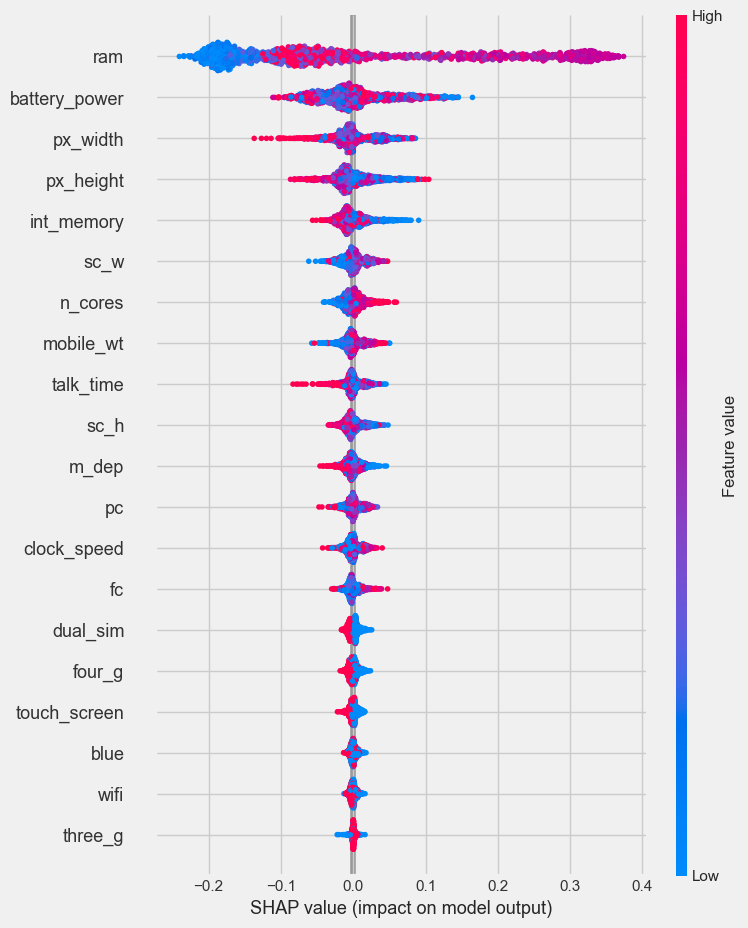

In [36]:
shap.initjs()
shap.summary_plot(shap_values[2],X_trenin)

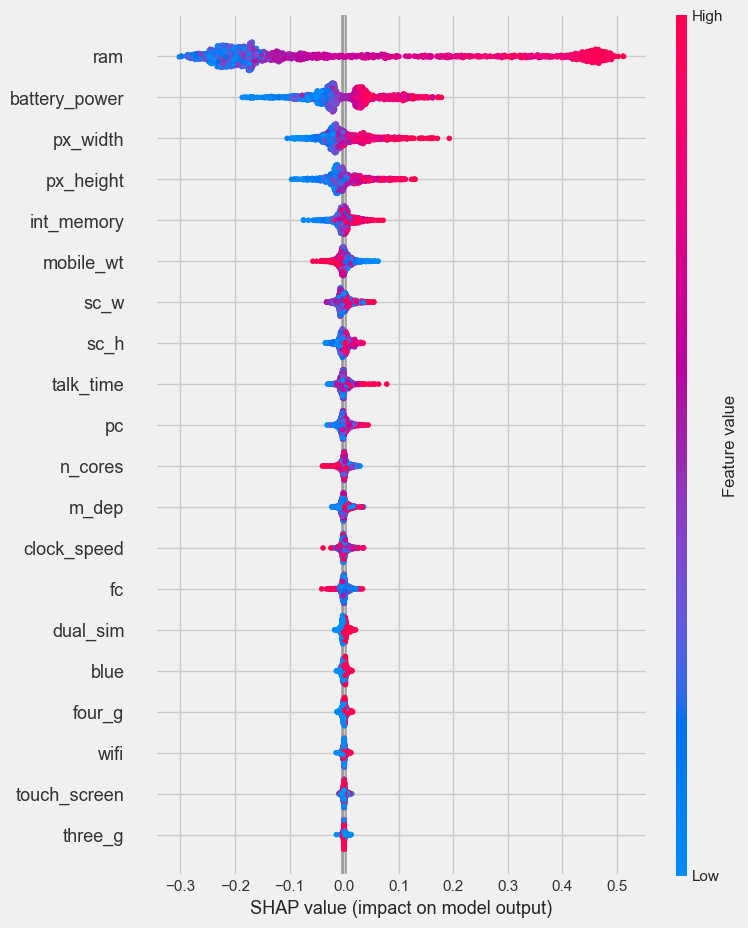

In [37]:
shap.initjs()
shap.summary_plot(shap_values[3],X_trenin)

In [38]:
explainer=shap.TreeExplainer(clf)
shap_values_test=explainer.shap_values(X_test)

In [39]:
y_pred=clf.predict(X_test)
misclassified=Y_test!=y_pred
sum(misclassified)

78

In [40]:
pred_true_tbl=pd.DataFrame({'True':Y_test,'Pred':y_pred,'Misclassified':misclassified})
display(pred_true_tbl[pred_true_tbl.Misclassified==True])
print(np.where(pred_true_tbl.Misclassified==True))

True  Pred  Misclassified
24       1     2           True
1516     1     2           True
292      2     1           True
1013     2     1           True
175      2     1           True
...    ...   ...            ...
1606     1     2           True
1620     2     3           True
751      1     0           True
1473     1     0           True
85       1     0           True

[78 rows x 3 columns]

(array([  3,   4,  11,  20,  24,  26,  32,  56,  60,  78,  88,  91, 100,
       109, 117, 124, 128, 139, 141, 165, 168, 172, 181, 210, 216, 235,
       239, 242, 256, 259, 263, 280, 285, 288, 293, 302, 307, 309, 330,
       334, 336, 342, 359, 385, 400, 405, 409, 412, 420, 422, 426, 430,
       440, 451, 455, 474, 475, 481, 484, 489, 494, 498, 512, 514, 527,
       534, 540, 546, 550, 551, 556, 557, 562, 567, 570, 577, 583, 588]),)


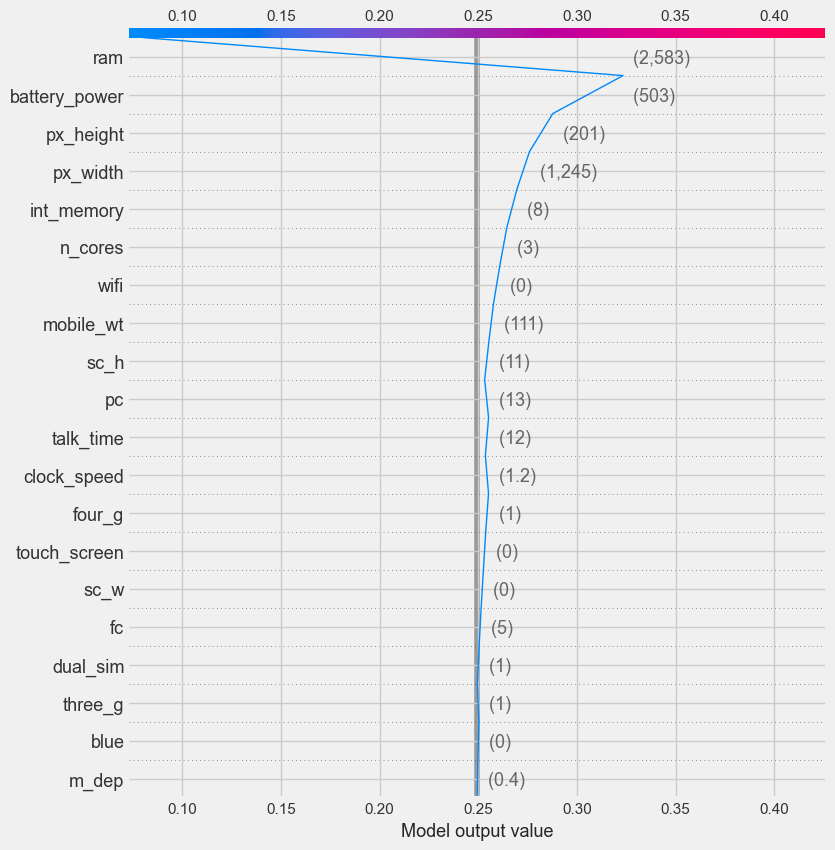

In [41]:
shap.initjs()
shap.decision_plot(explainer.expected_value[0],shap_values_test[0][3,:],X_test.iloc[3,:])

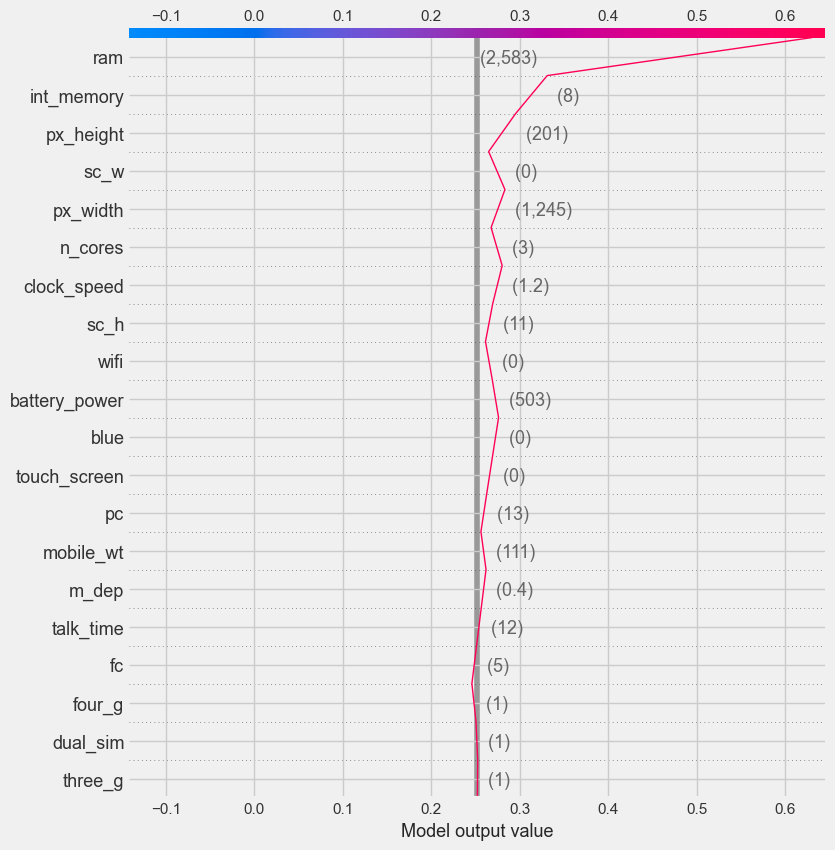

In [42]:
shap.initjs()
shap.decision_plot(explainer.expected_value[2],shap_values_test[2][3,:],X_test.iloc[3,:])

In [43]:
clf_modified = clf.fit(X_trenin_new,Y_trenin)

In [44]:
import xgboost as xgb

In [45]:
! pip install xgboost

In [46]:
import xgboost as xgb

In [47]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_trenin_new = X_trenin[['battery_power','ram','px_width','px_height']]
X_test_new = X_test[['battery_power','ram','px_width','px_height']]
X_train_trans = pd.DataFrame(sc.fit_transform(X_trenin_new), columns=X_trenin_new.columns)
X_test_trans = pd.DataFrame(sc.transform(X_test_new), columns=X_test_new.columns)

classifier = SVC(kernel = 'linear', random_state = 0,probability=True)
classifier.fit(X_train_trans.values, Y_trenin)

SVC(kernel='linear', probability=True, random_state=0)

In [48]:
classifier.score(X_test_trans,Y_test)

X has feature names, but SVC was fitted without feature names


0.9466666666666667

In [49]:
explainer = shap.KernelExplainer(classifier.predict_proba, X_train_trans) 
                                                                        
SHAP_values = explainer.shap_values(X_test_trans)

Using 1400 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/600 [00:00<?, ?it/s]

In [50]:
X_test_new.iloc[0]

battery_power     713
ram              1462
px_width         1477
px_height         123
Name: 1807, dtype: int64

In [51]:
Y_test

1807    0
63      2
956     3
24      1
1516    1
       ..
1096    3
1213    1
1908    3
1435    1
587     1
Name: price_range, Length: 600, dtype: int64

In [52]:
shap.initjs()
shap.force_plot(explainer.expected_value[0],
SHAP_values[0][0,:], X_test_new.iloc[0,:])

In [53]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], SHAP_values[0], X_test_new)

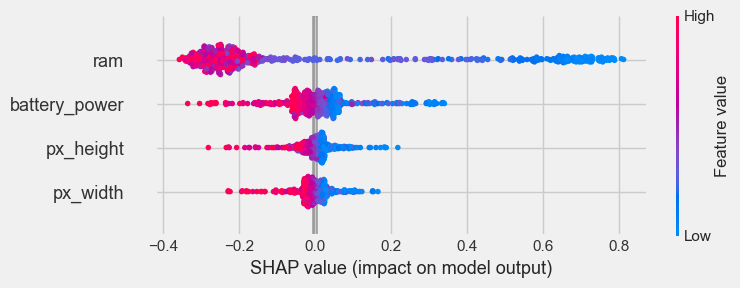

In [54]:
shap.initjs()
shap.summary_plot(SHAP_values[0], X_test_trans)

In [55]:
y_pred=classifier.predict(X_test_trans)
misclassified=Y_test!=y_pred
print('Количество неправльно классифицированых',sum(misclassified) )
pred_true_tbl=pd.DataFrame({'True':Y_test,'Pred':y_pred,'Misclassified':misclassified})
display(pred_true_tbl[pred_true_tbl.Misclassified==True])
print(np.where(pred_true_tbl.Misclassified==True)) 

Количество неправльно классифицированых 32


X has feature names, but SVC was fitted without feature names


True  Pred  Misclassified
1013     2     1           True
27       3     2           True
784      2     3           True
1881     2     1           True
35       1     0           True
448      2     3           True
1791     0     1           True
1669     2     1           True
412      1     0           True
1801     1     2           True
1772     3     2           True
387      1     2           True
1164     2     3           True
1268     2     3           True
502      1     0           True
1267     1     0           True
1337     2     1           True
1437     0     1           True
328      2     3           True
776      0     1           True
266      3     2           True
108      3     2           True
1586     1     0           True
804      1     2           True
177      3     2           True
1473     1     0           True
882      2     3           True
85       1     0           True
425      2     3           True
1213     1     2           True
1908     3     2           True
1435     1     0           True

(array([ 20, 124, 138, 139, 141, 170, 181, 216, 220, 233, 239, 259, 263,
       286, 293, 302, 342, 368, 409, 422, 451, 479, 493, 514, 527, 583,
       587, 588, 590, 596, 597, 598]),)


In [71]:
classifier = SVC(kernel = 'linear', random_state = 1200,probability=True)
classifier.fit(X_trenin.values, Y_trenin)
clf=RandomForestClassifier(n_estimators=100,random_state=1200)
clf.fit(X_trenin,Y_trenin)

y_pred1=classifier.predict(X_test)
y_pred=clf.predict(X_test)
pred_true_tbl=pd.DataFrame({'True':Y_test,'Pred SVM':y_pred1,'Pred Tree':y_pred})
display(pred_true_tbl)
print((pred_true_tbl))

misclassified=Y_test!=y_pred
misclassified1=Y_test!=y_pred1
print('Количество неправльно классифицированых методом случайного леса',sum(misclassified))
print('Точность=',((600-sum(misclassified))*(1/600)))
print('Количество неправльно классифицированых методом SVM',sum(misclassified1) )
print('Точность=',((600-sum(misclassified1))*(1/600)))


X has feature names, but SVC was fitted without feature names


True  Pred SVM  Pred Tree
1807     0         0          0
63       2         2          2
956      3         3          3
24       1         1          2
1516     1         1          2
...    ...       ...        ...
1096     3         3          3
1213     1         2          1
1908     3         2          3
1435     1         1          1
587      1         1          1

[600 rows x 3 columns]

      True  Pred SVM  Pred Tree
1807     0         0          0
63       2         2          2
956      3         3          3
24       1         1          2
1516     1         1          2
...    ...       ...        ...
1096     3         3          3
1213     1         2          1
1908     3         2          3
1435     1         1          1
587      1         1          1

[600 rows x 3 columns]
Количество неправльно классифицированых методом случайного леса 78
Точность= 0.8700000000000001
Количество неправльно классифицированых методом SVM 22
Точность= 0.9633333333333334
